# Aula 1 - Análise de Dados com Pandas

> Ensinar a carregar arquivos CSV no Google Colab, realizar leitura e visualização inicial de dados com Pandas. O aluno começará a manipular bases reais de dados com comandos simples de análise.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [8]:
df.shape

(133349, 11)

In [9]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [11]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Analisando quais sãos as categorias das colunas categóricas

#### Nível de senioridade

In [12]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


| Sigla | Significado | Descrição                                 |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


#### Tipo de contrato

In [13]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| FT    | Full-time    | Tempo integral – trabalho padrão de 40h/semana ou período completo   |
| PT    | Part-time    | Meio período – carga horária reduzida                                |
| CT    | Contract     | Contrato temporário ou por projeto – geralmente por prazo determinado|
| FL    | Freelance    | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal    |


#### Regime de trabalho

In [14]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  |
| 100   | Remoto      |
| 50    | Híbrido     |

#### Tamanho da empresa

In [15]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| M   | Medium    | Empresa de tamanho médio|
| L    | Large    | Empresa de tamanho grande                                |
| S    | Small    | Empresa de tamanho pequeno|


### Modificando o nome das categorias:

In [16]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [17]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [18]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [19]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [20]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método `describe()`, exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [21]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Com isso já conseguimos responder algumas perguntas, como:

* Qual o nível de experiência mais comum na base de dados?
* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

**O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.**

# Aula 2 - Preparação e limpeza dos Dados

> Capacitar o aluno renomear colunas, identificar e tratar dados faltantes, .


In [22]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [23]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


Checando quais anos existem no DataFrame:

In [25]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Exibindo quais linhas estão com os anos nulos:

In [26]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [27]:
# 1. Preenchimento com Valores Derivados (Imputation)
# Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

# 2. Remover Linhas com Dados Faltantes
# Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

# 3. Inferência e Preenchimento com Regras de Negócio
# Preencher com base em regras claras.

| Estratégia                     | Quando usar                                                               |
|-------------------------------|---------------------------------------------------------------------------|
| **Imputação inteligente**      | Quando os dados faltantes são significativos para a análise               |
| **Remoção de linhas**          | Quando o volume de nulos é pequeno e não afeta o dataset                  |
| **Preenchimento baseado em regra** | Quando há lógica ou negócio claro para inferir o valor                   |


## Exemplos fictícios

### Exemplo de preenchimento com média e mediana

In [28]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, np.nan, 3500, np.nan, 5000]
})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,4166.67,4000.0
2,Carlos,3500.0,3500.00,3500.0
3,Diana,NaN,4166.67,4000.0
4,Eduardo,5000.0,5000.00,5000.0


### Exemplo de preenchimento com o valor anterior

 Usar ffill (forward fill)

In [29]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


### Exemplo de preenchimento com o valor posterior

Usar bfill (backward fill)

In [30]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


### Exemplo de preenchimento com valor fixo

In [31]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


## Tratando o nosso DataFrame

### Removendo os dados nulos

Remoção das linhas com anos nulos:

In [32]:
df_limpo = df.dropna()

Obs: também dá para especificar a coluna, com
`dropna(subset=['nome da coluna'])`

In [33]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


### Alterando o tipo de dados

Deixar o ano como número inteiro:

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


> Podemos usar `assign()` para retornar um novo DataFrame com a modificação:

In [35]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

In [36]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Mostrar como salvar um arquivo após ter sido limpo e preparado para análises posteriores:

In [37]:
df_limpo.to_csv('dados-imersao.csv', index=False)

In [38]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


# Aula 3 - Visualização dos dados

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

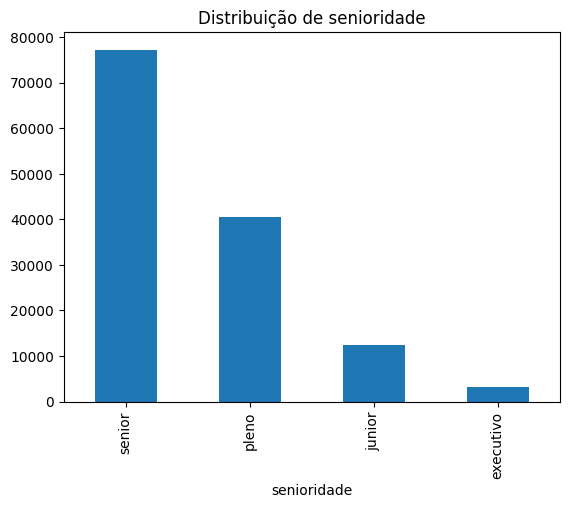

In [39]:
df_limpo['senioridade'].value_counts().plot(kind = 'bar', title = 'Distribuição de senioridade')

In [40]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

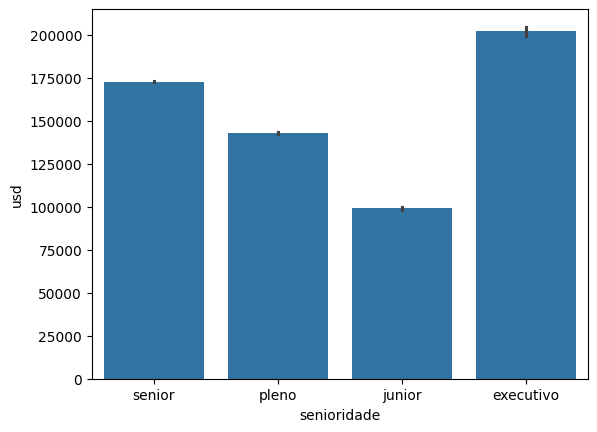

In [41]:
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')

In [42]:
import matplotlib.pyplot as plt

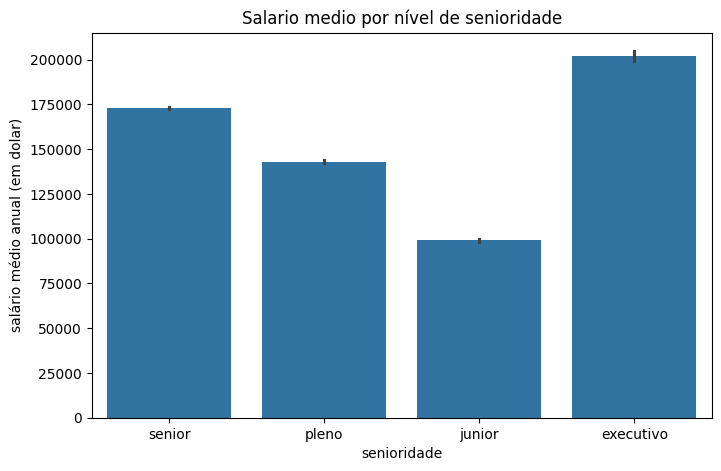

In [43]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')
plt.title('Salario medio por nível de senioridade')
plt.xlabel('senioridade')
plt.ylabel('salário médio anual (em dolar)')
plt.show()


In [44]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending= True)

,usd
senioridade,
junior,99034.963267
pleno,143044.845979
senior,172850.838301
executivo,202027.667813


In [45]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending= True).index

In [46]:
ordem

Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

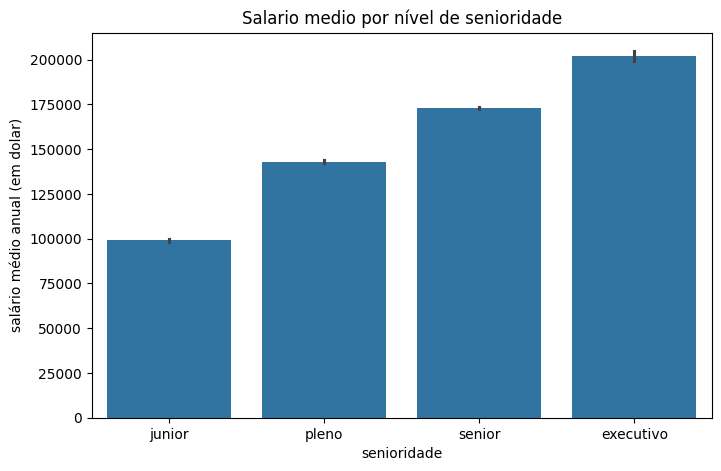

In [47]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd', order = ordem)
plt.title('Salario medio por nível de senioridade')
plt.xlabel('senioridade')
plt.ylabel('salário médio anual (em dolar)')
plt.show()


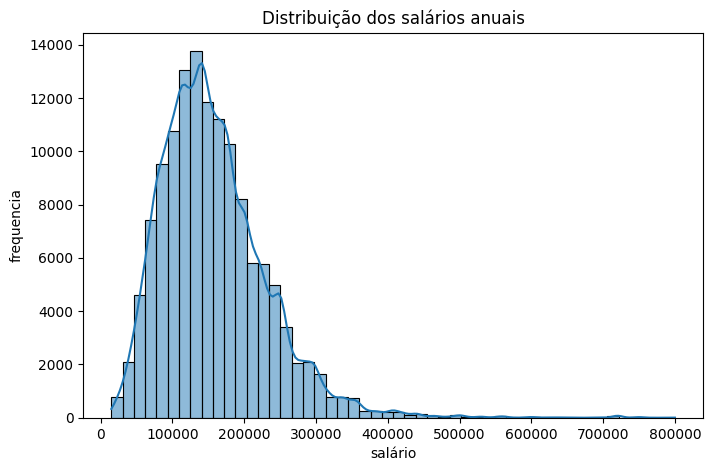

In [48]:
plt.figure(figsize= (8, 5))
sns.histplot(df_limpo['usd'], bins = 50, kde = True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('salário')
plt.ylabel('frequencia')
plt.show()

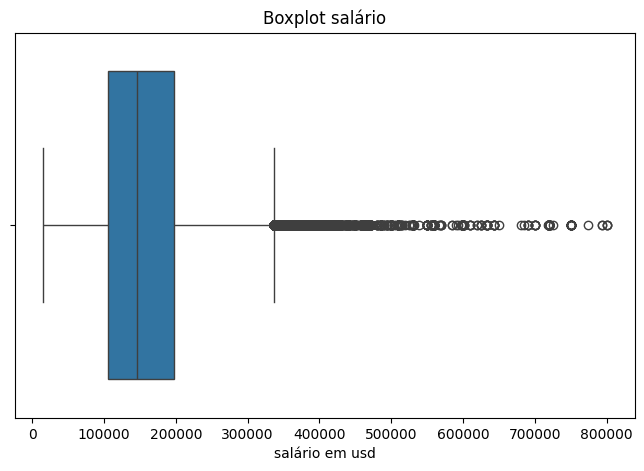

In [49]:
plt.figure(figsize= (8, 5))
sns.boxplot(x = df_limpo['usd'])
plt.title('Boxplot salário')
plt.xlabel('salário em usd')
plt.show()

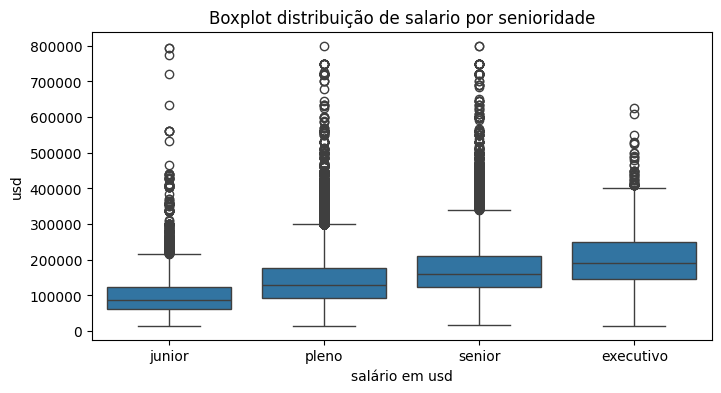

In [50]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize=(8,4))
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade)
plt.title('Boxplot distribuição de salario por senioridade')
plt.xlabel('salário em usd')
plt.show()

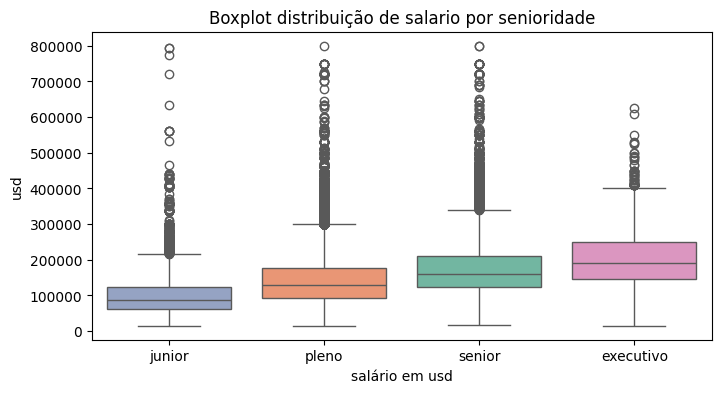

In [51]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize=(8,4))
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade, palette = 'Set2', hue = 'senioridade')
plt.title('Boxplot distribuição de salario por senioridade')
plt.xlabel('salário em usd')
plt.show()


In [52]:
import plotly.express as px

In [53]:
media_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()
fig = px.bar(media_senioridade, x='senioridade', y='usd', title='Média Salarial por Nível de Senioridade (em USD)', category_orders={'senioridade': ordem_senioridade})
fig.update_layout(xaxis_title='Nível de Senioridade', yaxis_title='Salário Médio Anual (USD)')
fig.show()

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'proporção dos tipos de trabalho'
             )
fig.show()

In [55]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'proporção dos tipos de trabalho',
             hole = 0.4
             )
fig.show()

In [56]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'proporção dos tipos de trabalho',
             hole = 0.4
             )
fig.update_traces(textinfo = 'percent+label')
fig.show()

## desafio: criar um grafico usando plotly sobre o salario (usd) de um data scientist (cargo) em relação ao país que a pessoa mora

In [57]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [58]:
df_limpo['empresa'].unique()

array(['US', 'AU', 'CA', 'JP', 'GB', 'MX', 'NL', 'ES', 'FR', 'MT', 'LT',
       'PH', 'NZ', 'DE', 'LV', 'IE', 'MK', 'AT', 'PL', 'SK', 'BR', 'SI',
       'FI', 'HK', 'LS', 'IN', 'JM', 'CH', 'BE', 'PE', 'SG', 'PT', 'IT',
       'HU', 'RO', 'AR', 'ZA', 'PA', 'EE', 'LU', 'DZ', 'EG', 'CL', 'GR',
       'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR', 'CY', 'CO', 'DK',
       'AE', 'BG', 'ID', 'JO', 'RS', 'UA', 'PR', 'SV', 'EC', 'DO', 'MY',
       'XK', 'CR', 'ZM', 'AM', 'IL', 'LB', 'NG', 'HR', 'PK', 'HN', 'VE',
       'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU', 'QA', 'GH', 'AD',
       'CF', 'TH', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)

In [59]:
pais_mapping = {
    'US': 'Estados Unidos',
    'AU': 'Austrália',
    'CA': 'Canadá',
    'JP': 'Japão',
    'GB': 'Reino Unido',
    'MX': 'México',
    'NL': 'Países Baixos',
    'ES': 'Espanha',
    'FR': 'França',
    'MT': 'Malta',
    'LT': 'Lituânia',
    'PH': 'Filipinas',
    'NZ': 'Nova Zelândia',
    'DE': 'Alemanha',
    'LV': 'Letônia',
    'IE': 'Irlanda',
    'MK': 'Macedônia do Norte',
    'AT': 'Áustria',
    'PL': 'Polônia',
    'SK': 'Eslováquia',
    'BR': 'Brasil',
    'SI': 'Eslovênia',
    'FI': 'Finlândia',
    'HK': 'Hong Kong',
    'LS': 'Lesoto',
    'IN': 'Índia',
    'JM': 'Jamaica',
    'CH': 'Suíça',
    'BE': 'Bélgica',
    'PE': 'Peru',
    'SG': 'Singapura',
    'PT': 'Portugal',
    'IT': 'Itália',
    'HU': 'Hungria',
    'RO': 'Romênia',
    'AR': 'Argentina',
    'ZA': 'África do Sul',
    'PA': 'Panamá',
    'EE': 'Estônia',
    'LU': 'Luxemburgo',
    'DZ': 'Argélia',
    'EG': 'Egito',
    'CL': 'Chile',
    'GR': 'Grécia',
    'KE': 'Quênia',
    'CD': 'Congo (RDC)',
    'SE': 'Suécia',
    'KR': 'Coreia do Sul',
    'TW': 'Taiwan',
    'NO': 'Noruega',
    'CZ': 'República Tcheca',
    'TR': 'Turquia',
    'CY': 'Chipre',
    'CO': 'Colômbia',
    'DK': 'Dinamarca',
    'AE': 'Emirados Árabes Unidos',
    'BG': 'Bulgária',
    'ID': 'Indonésia',
    'JO': 'Jordânia',
    'RS': 'Sérvia',
    'UA': 'Ucrânia',
    'PR': 'Porto Rico',
    'SV': 'El Salvador',
    'EC': 'Equador',
    'DO': 'República Dominicana',
    'MY': 'Malásia',
    'XK': 'Kosovo',
    'CR': 'Costa Rica',
    'ZM': 'Zâmbia',
    'AM': 'Armênia',
    'IL': 'Israel',
    'LB': 'Líbano',
    'NG': 'Nigéria',
    'HR': 'Croácia',
    'PK': 'Paquistão',
    'HN': 'Honduras',
    'VE': 'Venezuela',
    'AS': 'Samoa Americana',
    'SA': 'Arábia Saudita',
    'OM': 'Omã',
    'BA': 'Bósnia e Herzegovina',
    'VN': 'Vietnã',
    'GI': 'Gibraltar',
    'MU': 'Maurício',
    'RU': 'Rússia',
    'QA': 'Catar',
    'GH': 'Gana',
    'AD': 'Andorra',
    'CF': 'República Centro-Africana',
    'TH': 'Tailândia',
    'IR': 'Irã',
    'BS': 'Bahamas',
    'IQ': 'Iraque',
    'CN': 'China',
    'MD': 'Moldávia'
}

df_limpo['empresa'] = df_limpo['empresa'].replace(pais_mapping)
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,Estados Unidos,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,Estados Unidos,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,Austrália,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,Austrália,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,Estados Unidos,media


In [60]:
df_limpo['cargo'].value_counts()

,count
cargo,
Data Scientist,17311
Software Engineer,15006
Data Engineer,14868
Data Analyst,12381
Engineer,9454
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [61]:
cientistas = df_limpo[df_limpo['cargo'] == 'Data Scientist']
ordem_pais = cientistas.groupby('empresa')['usd'].mean().sort_values(ascending= False).index
media_pais = cientistas.groupby('empresa')['usd'].mean().reset_index()
fig = px.bar(media_pais, x = 'empresa', y = 'usd', title = 'Média salarial de cientistas de dados por país', category_orders={'empresa': ordem_pais})
fig.show()

In [62]:

df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,Estados Unidos,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,Estados Unidos,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,Austrália,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,Austrália,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,Estados Unidos,media


In [63]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.2 MB/s eta 0:00:00


In [64]:
import pycountry

In [73]:
def iso2_to_iso3(iso2):
  try:
    return pycountry.countries.get(alpha_2=iso2).alpha_3
  except AttributeError:
    return None
#
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']

media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [70]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,Estados Unidos,media,USA
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,Estados Unidos,media,USA
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,Austrália,media,AUS
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,Austrália,media,AUS
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,Estados Unidos,media,USA


In [71]:
df_limpo.to_csv('dados-imersao_final.csv', index = False)